In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from neuralprophet import NeuralProphet
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
df = pd.read_csv('../raw_data/stock_prices_latest.csv', nrows=100000)

In [3]:
df.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   symbol             100000 non-null  object 
 1   date               100000 non-null  object 
 2   open               100000 non-null  float64
 3   high               100000 non-null  float64
 4   low                100000 non-null  float64
 5   close              100000 non-null  float64
 6   close_adjusted     100000 non-null  float64
 7   volume             100000 non-null  int64  
 8   split_coefficient  100000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.9+ MB


In [5]:
df = df.sort_values(by='date')
is_cpny = df['symbol']=='MSFT'
df = df[is_cpny]
date_final = pd.Series(df.iloc[-20:]['date'])
date_final

2167    2017-12-26
22      2017-12-27
564     2017-12-28
1543    2017-12-29
853     2018-01-02
103     2018-01-03
3843    2018-01-04
2649    2018-01-05
1138    2018-01-08
1160    2018-01-09
3660    2018-01-10
1990    2018-01-11
3864    2018-01-12
169     2018-01-16
3260    2018-01-17
575     2018-01-18
904     2018-01-19
2740    2018-01-22
3647    2018-01-23
2348    2018-01-24
Name: date, dtype: object

<AxesSubplot:>

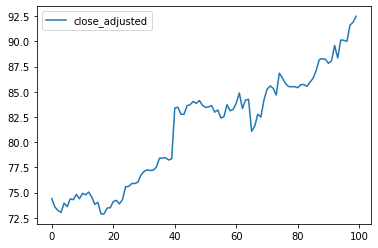

In [6]:
is_cpny = df['symbol']=='MSFT'
df_msft = df[is_cpny]
df_msft = df_msft.sort_values(by='date')
df_msft = df_msft.iloc[-100:]
df_msft = df_msft.reset_index().drop(columns='index')
df_msft = df_msft["close_adjusted"]
df_msft = pd.DataFrame(df_msft)
df_msft.plot()

In [7]:
df_msft.tail(10)

,close_adjusted
90,87.82
91,88.08
92,89.60
93,88.35
94,90.14
95,90.10
96,90.00
97,91.61
98,91.90
99,92.49


In [8]:
y = df_msft.close_adjusted

In [9]:
y

0     74.3935
1     73.5676
2     73.2393
3     73.0304
4     73.9656
       ...   
95    90.1000
96    90.0000
97    91.6100
98    91.9000
99    92.4900
Name: close_adjusted, Length: 100, dtype: float64

In [10]:
from statsmodels.tsa.stattools import adfuller
print('p-value: ', adfuller(y)[1])

p-value:  0.9732070330172667


In [11]:
# First diff
print('p-value: ', adfuller(y.diff(1).fillna(0))[1])

p-value:  6.35701846005648e-14


In [12]:
# Second order diff
print('p-value: ', adfuller(y.diff(1).diff(1).fillna(0))[1])

p-value:  9.781552285819646e-10


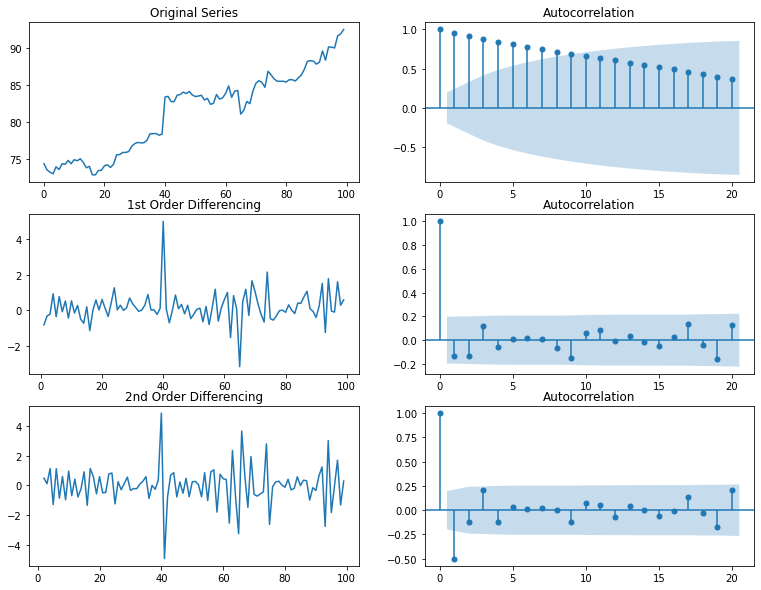

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [14]:
y_diff = y.diff().dropna()

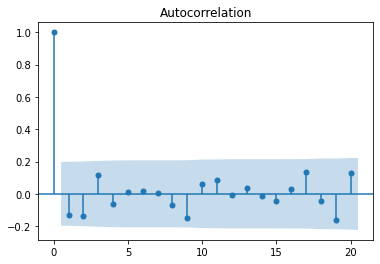

In [15]:
plot_acf(y_diff);

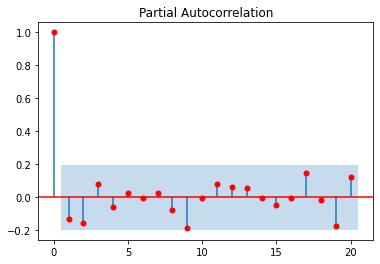

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(y_diff, c='r');

In [17]:
from statsmodels.tsa.arima_model import ARIMA

# 1. initialize the model
arima = ARIMA(y, order=(1, 1, 0))

# 2. fit the models
arima = arima.fit()

arima.summary()

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.close_adjusted   No. Observations:                   99
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -125.989
Method:                       css-mle   S.D. of innovations              0.864
Date:                Thu, 10 Jun 2021   AIC                            257.978
Time:                        12:15:21   BIC                            265.763
Sample:                             1   HQIC                           261.128
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1835      0.077      2.390      0.017       0.033       0.334
ar.L1.D.close_adjusted    -0.1319      0.100     -1.321      0.187      -0.328       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.5792           +0.0000j            7.5792            0.5000
-----------------------------------------------------------------------------
"""

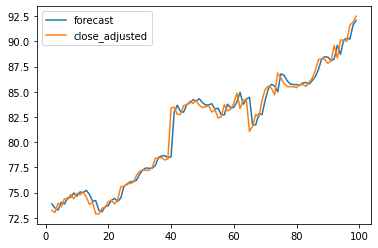

In [18]:
# Actual vs Fitted
arima.plot_predict(dynamic=False);

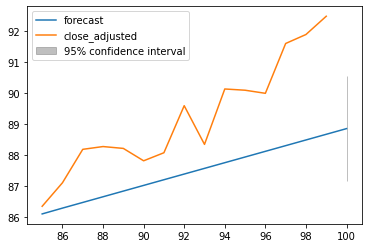

In [19]:
arima.plot_predict(85, 100, dynamic=True);

In [20]:
y_train = y[:80]
y_test = y[80:]
arima = ARIMA(y_train, order=(1, 1, 1)).fit()

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning

In [21]:
(forecast, stderr, conf_int) = arima.forecast(20, alpha=0.05)

In [22]:
forecast = pd.Series(forecast, name='forecast')
stderr = pd.Series(stderr)
conf_int = pd.DataFrame(conf_int, columns=['low', 'high'])

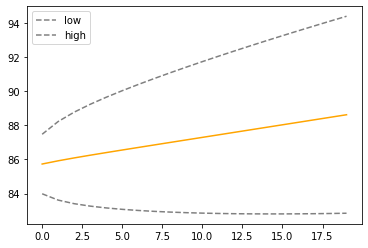

In [23]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend()

In [24]:
forecast.index = y_test.index
conf_int.index = y_test.index

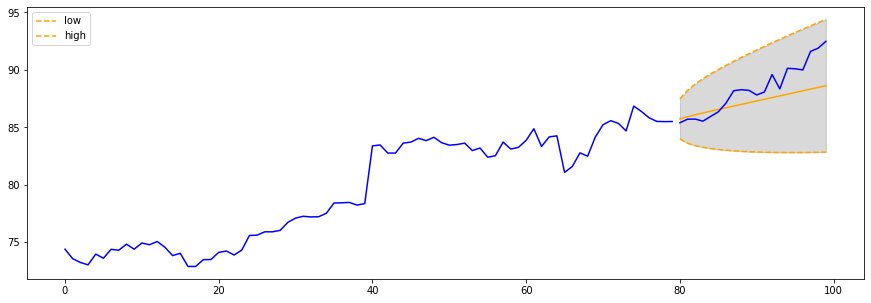

In [25]:
plt.figure(figsize=(15,5))
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='orange', ls='--')
plt.plot(conf_int['high'], label='high', c='orange', ls='--')
plt.plot(y_train, c='blue')
plt.plot(y_test, c='blue')
plt.legend()
plt.fill_between(y_test.index, conf_int['low'], conf_int['high'], color='k', alpha=.15)

<AxesSubplot:title={'center':'Residuals'}>

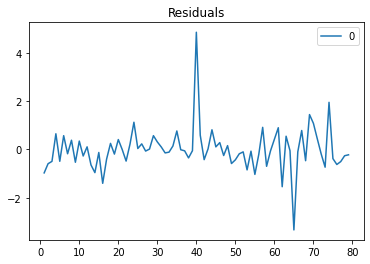

In [26]:
residuals = pd.DataFrame(arima.resid)
residuals.plot(title="Residuals")

<AxesSubplot:title={'center':'Residual density'}, ylabel='Density'>

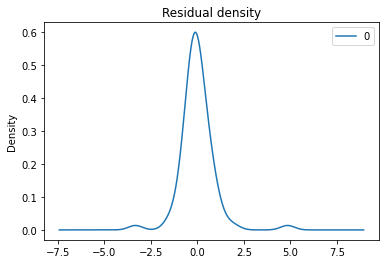

In [27]:
residuals.plot(kind='kde', title='Residual density')

In [28]:
import numpy as np
from statsmodels.tsa.stattools import acf
def forecast_accuracy(y_pred: pd.Series, y_true: pd.Series) -> float:
    
    mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))  # Mean Absolute Percentage Error
    me = np.mean(y_pred - y_true)             # ME
    mae = np.mean(np.abs(y_pred - y_true))    # MAE
    mpe = np.mean((y_pred - y_true)/y_true)   # MPE
    rmse = np.mean((y_pred - y_true)**2)**.5  # RMSE
    corr = np.corrcoef(y_pred, y_true)[0,1]   # Correlation between the Actual and the Forecast
    mins = np.amin(np.hstack([y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)]), axis=1)
    maxs = np.amax(np.hstack([y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(y_pred-y_true, fft=False)[1]                      # Lag 1 Autocorrelation of Error
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [29]:
forecast, y_test

(80    85.734757
 81    85.923403
 82    86.092819
 83    86.251995
 84    86.405719
 85    86.556538
 86    86.705811
 87    86.854261
 88    87.002272
 89    87.150050
 90    87.297704
 91    87.445291
 92    87.592843
 93    87.740376
 94    87.887899
 95    88.035417
 96    88.182932
 97    88.330445
 98    88.477958
 99    88.625470
 Name: forecast, dtype: float64,
 80    85.40
 81    85.71
 82    85.72
 83    85.54
 84    85.95
 85    86.35
 86    87.11
 87    88.19
 88    88.28
 89    88.22
 90    87.82
 91    88.08
 92    89.60
 93    88.35
 94    90.14
 95    90.10
 96    90.00
 97    91.61
 98    91.90
 99    92.49
 Name: close_adjusted, dtype: float64)

In [30]:
forecast_accuracy(forecast, y_test)

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


{'mape': 0.014926330376450858,
 'me': -1.1133020249239358,
 'mae': 1.3428251139969227,
 'mpe': -0.012248679873274293,
 'rmse': 1.7448701191864282,
 'acf1': 0.7156052451280671,
 'corr': 0.9643351384478659,
 'minmax': 0.014919195148275888}

In [31]:
import pmdarima as pm

model = pm.auto_arima(y_train, 
                      start_p=0, max_p=3,
                      start_q=0, max_q=3, 
                      d=None,           # let model determine 'd'
                      test='adf',       # using adftest to find optimal 'd'
                      trace=True, error_action='ignore',  suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=212.004, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=213.304, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=212.927, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=211.901, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=213.974, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.126 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -104.950
Date:                Thu, 10 Jun 2021   AIC                            211.901
Time:                        12:15:22   BIC                            214.270
Sample:                             0   HQIC                           212.850
                                 - 80                                         
Co

In [32]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
import itertools

range_p = [0,1,2]
range_d = [1]
range_q = [0,1,2]
grid = itertools.product(range_p, range_d, range_q)
orders = []
r2s = []
aics = []
fold_idxs = []
for (p,d,q) in grid:
    order = (p,d,q)
    folds = TimeSeriesSplit(n_splits=5)
    for fold_idx, (train_idx, test_idx) in enumerate(folds.split(y)):
        fold_idxs.append(fold_idx)
        y_train = y[train_idx]
        y_test = y[test_idx]
        model = ARIMA(y_train, order=order).fit()
        y_pred = model.forecast(len(y_test))[0]
        print(y_pred)
        orders.append(order)
        aics.append(model.aic)
        
        
results = pd.DataFrame(list(zip(fold_idxs, orders, aics)),#, r2s)), 
                   columns =['Fold', '(p,d,q)', 'AIC'])#, 'R2'])

[73.45086841 73.40373683 73.35660524 73.30947365 73.26234207 73.21521048
 73.16807889 73.12094731 73.07381572 73.02668413 72.97955255 72.93242096
 72.88528937 72.83815779 72.7910262  72.74389461]
[78.52794571 78.64279143 78.75763714 78.87248286 78.98732857 79.10217429
 79.21702    79.33186571 79.44671143 79.56155714 79.67640286 79.79124857
 79.90609429 80.02094    80.13578571 80.25063143]
[83.68600196 83.86470392 84.04340588 84.22210784 84.4008098  84.57951176
 84.75821373 84.93691569 85.11561765 85.29431961 85.47302157 85.65172353
 85.83042549 86.00912745 86.18782941 86.36653137]
[82.90517164 83.03034328 83.15551493 83.28068657 83.40585821 83.53102985
 83.65620149 83.78137313 83.90654478 84.03171642 84.15688806 84.2820597
 84.40723134 84.53240299 84.65757463 84.78274627]
[85.67429518 85.80859036 85.94288554 86.07718072 86.2114759  86.34577108
 86.48006627 86.61436145 86.74865663 86.88295181 87.01724699 87.15154217
 87.28583735 87.42013253 87.55442771 87.68872289]


/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


[73.42820318 73.38719505 73.34618691 73.30517877 73.26417063 73.22316249
 73.18215435 73.14114621 73.10013807 73.05912993 73.01812179 72.97711365
 72.93610551 72.89509737 72.85408923 72.81308109]
[78.48256832 78.59770614 78.71284395 78.82798177 78.94311958 79.0582574
 79.17339521 79.28853302 79.40367084 79.51880865 79.63394647 79.74908428
 79.8642221  79.97935991 80.09449773 80.20963554]
[83.69273887 83.87239899 84.05205911 84.23171923 84.41137934 84.59103946
 84.77069958 84.9503597  85.13001982 85.30967994 85.48934006 85.66900018
 85.8486603  86.02832042 86.20798054 86.38764065]
[82.75186091 82.87696955 83.0020782  83.12718684 83.25229548 83.37740412
 83.50251277 83.62762141 83.75273005 83.87783869 84.00294734 84.12805598
 84.25316462 84.37827327 84.50338191 84.62849055]
[85.72331563 85.8599253  85.99653498 86.13314466 86.26975433 86.40636401
 86.54297368 86.67958336 86.81619304 86.95280271 87.08941239 87.22602206
 87.36263174 87.49924142 87.63585109 87.77246077]
[73.7717617  73.85426

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning

[78.46944145 78.63915079 78.70889859 78.86678695 78.94695783 79.09565569
 79.18393025 79.32548274 79.4200577  79.55605485 79.65552819 79.78720621
 79.89048793 80.01880793 80.12505056 80.2507598 ]
[83.74558156 83.95890393 84.15910323 84.35240269 84.54207435 84.72983858
 84.91659992 85.10283396 85.28879075 85.47460178 85.66033616 85.84603025
 86.03170315 86.21736491 86.40302081 86.58867363]
[82.85687085 82.96551064 83.08622471 83.21152781 83.33857503 83.46628513
 83.59424718 83.72230497 83.85039916 83.97850718 84.10662046 84.23473574
 84.36285177 84.4909681  84.61908453 84.74720101]
[85.74689809 85.92049002 86.07736188 86.22584005 86.37010449 86.5122536
 86.65334077 86.79389485 86.9341813  87.07433341 87.21441807 87.35446887
 87.49450267 87.63452795 87.77454893 87.91456777]
[74.09564464 74.55372088 74.67190442 74.67387943 74.63612298 74.58478245
 74.52879755 74.47122475 74.41310904 74.35480773 74.29644294 74.23805647
 74.17966257 74.12126614 74.06286884 74.00447124]


/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning

[78.50814536 78.6998383  78.75556121 78.92015988 78.99757808 79.14480461
 79.23613327 79.37222122 79.47246891 79.6014151  79.70738143 79.83174851
 79.9413815  80.06281256 80.17479651 80.29434508]
[83.77076812 83.99571175 84.18789099 84.37526554 84.56193551 84.74850216
 84.93505366 85.12160293 85.30815188 85.49470078 85.68124968 85.86779857
 86.05434746 86.24089636 86.42744525 86.61399414]
[82.72502582 82.78892095 82.93032339 83.0524046  83.17930226 83.30499926
 83.43099557 83.55691726 83.68285755 83.80879321 83.93473002 84.06066655
 84.18660314 84.31253972 84.4384763  84.56441288]


/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning

[85.74349123 85.92402743 86.0486078  86.19191557 86.32895562 86.46809336
 86.60652904 86.74519969 86.8837917  87.02241003 87.16101955 87.29963202
 87.4382435  87.57685531 87.71546701 87.85407875]
[73.59634063 73.54316246 73.53407268 73.48069645 73.44537919 73.39626718
 73.35383776 73.30693755 73.26240597 73.21639207 73.17120089 73.1255121
 73.08010624 73.03453222 72.98905501 72.94352078]
[78.51685385 78.76005654 78.86478994 78.99972198 79.11014061 79.2268198
 79.3391127  79.45266802 79.56543122 79.67844427 79.79131315 79.90423085
 80.01712213 80.13002286 80.24291873 80.35581641]
[83.75371233 83.95351867 84.1283307  84.31071254 84.49639189 84.68086944
 84.86491932 85.04915652 85.23344805 85.41771082 85.60196688 85.78622729
 85.9704885  86.15474906 86.33900953 86.52327009]
[82.70155796 82.61635605 82.80924091 82.97249115 83.07825641 83.19693242
 83.3267324  83.45246503 83.57622059 83.70108663 83.82626069 83.9511575
 84.07601797 84.20094314 84.325869   84.45078065]
[85.73956369 85.9321448

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning

[83.7886131  84.01366607 84.19492175 84.3751612  84.56152089 84.74930624
 84.93650455 85.12337408 85.31025979 85.49719641 85.68414134 85.87108064
 86.05801756 86.2449548  86.43189245 86.61883014]
[82.57924503 82.54360739 82.78916885 82.91527239 83.00914887 83.14045856
 83.26866787 83.38892396 83.512188   83.63646961 83.75974967 83.88307601
 84.00662563 84.13010043 84.25354392 84.37701403]
[85.74799464 85.9258129  86.0313577  86.17426164 86.31712923 86.4518174
 86.58999247 86.72847865 86.86606765 87.00397    87.14193587 87.27980599
 87.4177029  87.55560942 87.69350598 87.83140467]


/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning

[73.98902736 74.38430338 74.39807082 74.29299498 74.20956741 74.15361582
 74.10376219 74.05147979 73.99732183 73.94290626 73.88871254 73.8346402
 73.78057375 73.72648912 73.67239709 73.61830547]
[78.59328805 78.89744139 78.91464933 78.91455338 79.10886873 79.27063813
 79.31071685 79.39996401 79.55886048 79.66934065 79.7445494  79.8598887
 79.98955394 80.08933329 80.18637122 80.30387017]


/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning

[84.11439425 84.62152206 84.82538331 84.75315714 84.61505294 84.63923774
 84.91547234 85.35196044 85.76026267 85.99476197 86.04560347 86.02821317
 86.08952871 86.3047845  86.63575166 86.97087895]
[82.44521643 82.36700325 82.75838893 82.85914107 82.87453113 83.04573844
 83.1924742  83.28294365 83.40558963 83.53949113 83.655441   83.77361044
 83.89849519 84.01983562 84.13971783 84.26166226]
[85.74744528 85.92489802 86.02728011 86.17040135 86.31485348 86.44826637
 86.58619681 86.72497141 86.86221526 86.99991628 87.13780885 87.2754998
 87.41323035 87.5509952  87.6887348  87.82647671]


/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [33]:
results = results.sort_values('AIC').groupby('(p,d,q)').mean()['AIC'].sort_values()


In [34]:
results

(p,d,q)
(0, 1, 0)    124.270861
(0, 1, 1)    125.686317
(1, 1, 0)    125.762863
(2, 1, 0)    125.927064
(0, 1, 2)    126.124403
(1, 1, 1)    126.798448
(1, 1, 2)    127.497124
(2, 1, 1)    127.711917
(2, 1, 2)    128.327740
Name: AIC, dtype: float64

In [35]:
best_order = results.index[0]

In [36]:
model = ARIMA(y_train, order=best_order).fit()
model

In [37]:
(forecast, stderr, conf_int) = model.forecast(27, alpha=0.05)

In [38]:
len(forecast)

27

In [39]:
forecast = pd.Series(forecast)
forecast

0     85.674295
1     85.808590
2     85.942886
3     86.077181
4     86.211476
5     86.345771
6     86.480066
7     86.614361
8     86.748657
9     86.882952
10    87.017247
11    87.151542
12    87.285837
13    87.420133
14    87.554428
15    87.688723
16    87.823018
17    87.957313
18    88.091608
19    88.225904
20    88.360199
21    88.494494
22    88.628789
23    88.763084
24    88.897380
25    89.031675
26    89.165970
dtype: float64

In [40]:
type(date_final), type(forecast)

(pandas.core.series.Series, pandas.core.series.Series)

In [41]:
def add_n_days(dates, n):
    for i in range(n):
        last = dates.iloc[-1]
        last = last + pd.DateOffset(days=1)
        dates = dates.append(last)
    return dates

In [42]:
from datetime import timedelta 

date_final = pd.DataFrame(date_final)
date_final = pd.DataFrame(pd.to_datetime(date_final['date']))

date_final = add_n_days(date_final, 7)

In [43]:
date_final = date_final['date'].dt.strftime('%Y-%m-%d')

In [44]:
pd.DataFrame({'Date' : date_final.values,'Forecast' : forecast.values})

,Date,Forecast
0,2017-12-26,85.674295
1,2017-12-27,85.808590
2,2017-12-28,85.942886
3,2017-12-29,86.077181
4,2018-01-02,86.211476
5,2018-01-03,86.345771
6,2018-01-04,86.480066
7,2018-01-05,86.614361
8,2018-01-08,86.748657
9,2018-01-09,86.882952


In [45]:
forecast

0     85.674295
1     85.808590
2     85.942886
3     86.077181
4     86.211476
5     86.345771
6     86.480066
7     86.614361
8     86.748657
9     86.882952
10    87.017247
11    87.151542
12    87.285837
13    87.420133
14    87.554428
15    87.688723
16    87.823018
17    87.957313
18    88.091608
19    88.225904
20    88.360199
21    88.494494
22    88.628789
23    88.763084
24    88.897380
25    89.031675
26    89.165970
dtype: float64

In [46]:
forecast = forecast[4:20]

In [51]:
forecast = forecast.reset_index(drop = True)

In [53]:
y_test = y_test.reset_index(drop = True)

In [54]:
forecast_accuracy(forecast, y_test)

/home/juliend/.pyenv/versions/3.8.6/envs/usmarket/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


{'mape': 0.020236047349652397,
 'me': -1.7931852409639024,
 'mae': 1.8258697289157073,
 'mpe': -0.019855774075053154,
 'rmse': 2.2089898196004962,
 'acf1': 0.6038231381830498,
 'corr': 0.9508365961685509,
 'minmax': 0.020235470672956724}